# Set up

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
import glob
from scipy import signal

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Graduation_Project

 BCICIV_2a_gdf.zip   eeg-motor-movementimagery-dataset-1.0.0.zip   Matlab
 BCICIV_2b_gdf.zip  'Experiment data files'
 Dataset	     grasp-and-lift-eeg-detection.zip


In [ ]:
!cp /content/drive/MyDrive/Graduation_Project/Matlab -r /content

In [ ]:
!cp /content/drive/MyDrive/Graduation_Project/Dataset -r /content

In [3]:
!cp /content/drive/MyDrive/Graduation_Project/eeg-motor-movementimagery-dataset-1.0.0.zip /content

In [4]:
!unzip '/content/eeg-motor-movementimagery-dataset-1.0.0.zip' -d dataset

Archive:  /content/eeg-motor-movementimagery-dataset-1.0.0.zip
   creating: dataset/files/
   creating: dataset/files/S001/
   creating: dataset/files/S002/
   creating: dataset/files/S003/
   creating: dataset/files/S004/
   creating: dataset/files/S005/
   creating: dataset/files/S006/
   creating: dataset/files/S007/
   creating: dataset/files/S008/
   creating: dataset/files/S009/
   creating: dataset/files/S010/
   creating: dataset/files/S011/
   creating: dataset/files/S012/
   creating: dataset/files/S013/
   creating: dataset/files/S014/
   creating: dataset/files/S015/
   creating: dataset/files/S016/
   creating: dataset/files/S017/
   creating: dataset/files/S018/
   creating: dataset/files/S019/
   creating: dataset/files/S020/
   creating: dataset/files/S021/
   creating: dataset/files/S022/
   creating: dataset/files/S023/
   creating: dataset/files/S024/
   creating: dataset/files/S025/
   creating: dataset/files/S026/
   creating: dataset/files/S027/
   creating: datas

In [5]:
!pip install mne
!pip install matplotlib
!pip install scikit-learn
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Matlab Data

In [ ]:
import scipy.io

# Load the MATLAB file.
mat = scipy.io.loadmat('/content/Matlab/H01.mat')

In [ ]:
key_names = mat.keys()

# Print the key names.
print(key_names)

dict_keys(['__header__', '__version__', '__globals__', 'events', 'header', 'signal'])


In [ ]:
events = mat['events']

In [ ]:
events

array([[(array([[503587, 501794, 534562, 503588, 501795, 534563, 503588, 501795,
                534563, 503587, 501794, 534562, 503587, 501794, 534562, 503588,
                501795, 534563, 503588, 501795, 534563, 503588, 501795, 534563,
                503587, 501794, 534562, 503587, 501794, 534562, 503588, 501795,
                534563, 503588, 501795, 534563, 503588, 501795, 534563, 503587,
                501794, 534562, 503587, 501794, 534562, 503588, 501795, 534563,
                503587, 501794, 534562, 503587, 501794, 534562, 503588, 501795,
                534563, 503588, 501795, 534563, 503588, 501795, 534563, 503587,
                501794, 534562, 503587, 501794, 534562, 503588, 501795, 534563,
                503588, 501795, 534563, 503587, 501794, 534562, 503588, 501795,
                534563, 503588, 501795, 534563, 503587, 501794, 534562, 503587,
                501794, 534562, 503588, 501795, 534563, 503588, 501795, 534563,
                503587, 501794, 534562,

In [ ]:
mat['header']

array([[(array([[     3,      1, 140904],
               [     4, 140905, 280520],
               [     7, 280521, 424512],
               [     8, 424513, 561584],
               [     1, 561585, 607668],
               [     2, 607669, 653753],
               [     5, 653754, 699847],
               [     6, 699848, 745934],
               [     9, 745935, 792024],
               [    10, 792025, 838113]], dtype=int32), array(['hero'], dtype='<U4'), array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[array(['FC3'], dtype='<U3'), array(['FCz'], dtype='<U3'),
                array(['FC4'], dtype='<U3'), array(['C3'], dtype='<U2'),
                array(['C1'], dtype='<U2'), array(['Cz'], dtype='<U2'),
                array(['C2'], dtype='<U2'), array(['C4'], dtype='<U2'),
                array(['CP3'], dtype='<U3'), array(['CPz'], dtype='<U3'),
                array(['CP4'], dtype='<U3'), array(['A2'], dtype='<U2'),
    

In [ ]:
mat['signal']

array([[  2359.66927718,   2306.05840497,   2309.0394907 , ...,
         -4773.04676813,  -4805.38850628,  -4788.25638916],
       [ 23618.13225357,  23563.65747489,  23548.63036931, ...,
         15730.92166366,  15693.6398406 ,  15697.0832988 ],
       [ 19069.11711934,  19014.73968224,  19005.45572956, ...,
         12186.34990217,  12154.42186571,  12165.74999145],
       ...,
       [ 21718.03688539,  21668.2345023 ,  21666.77437868, ...,
         15225.88923933,  15194.5939231 ,  15204.40108674],
       [ 25995.89489592,  25948.87891539,  25934.77655478, ...,
         19705.96220336,  19678.63355629,  19685.0946033 ],
       [-43855.44560948, -43877.06760674, -43873.86750247, ...,
        -32491.70501872, -32507.77854623, -32487.15430011]])

# Read Data

* T0 corresponds to rest
* T1 corresponds to onset of motion (real or imagined) of
the left fist (in runs 3, 4, 7, 8, 11, and 12)
both fists (in runs 5, 6, 9, 10, 13, and 14)
* T2 corresponds to onset of motion (real or imagined) of
the right fist (in runs 3, 4, 7, 8, 11, and 12)
both feet (in runs 5, 6, 9, 10, 13, and 14)

In [1]:
import pandas as pd
from glob import glob
import mne

In [2]:
fnames = []
for i in range(1, 60):
  for j in [4, 8, 12]:
    if j != 12:
      if i < 10: 
        fnames.append("/content/dataset/files/S00%d/S00%dR0%d.edf" % (i, i, j))
      else:
        fnames.append("/content/dataset/files/S0%d/S0%dR0%d.edf" % (i, i, j))
    else:
      if i < 10:
        fnames.append("/content/dataset/files/S00%d/S00%dR%d.edf" % (i, i, j))
      else:
        fnames.append("/content/dataset/files/S0%d/S0%dR%d.edf" % (i, i, j))



In [3]:
len(fnames)

207

In [ ]:
raw = mne.io.read_raw_edf("/content/dataset/files/S001/S001R04.edf", preload=True)

Extracting EDF parameters from /content/dataset/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [ ]:
events=mne.events_from_annotations(raw)
events[1]

Used Annotations descriptions: ['T0', 'T1', 'T2']


{'T0': 1, 'T1': 2, 'T2': 3}

In [ ]:
event_dict={
 'Rest': 1,
 'Left fist': 2,
 'Right fist': 3,
}

In [ ]:
epochs = mne.Epochs(raw, events[0], event_id=[1, 2, 3],tmin= -0.1, tmax=0.7, preload=True)

Not setting metadata
30 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 129 original time points ...
1 bad epochs dropped


In [ ]:
epochs.get_data().shape

(29, 64, 129)

In [ ]:
label=epochs.events[:,-1]
len(label)

29

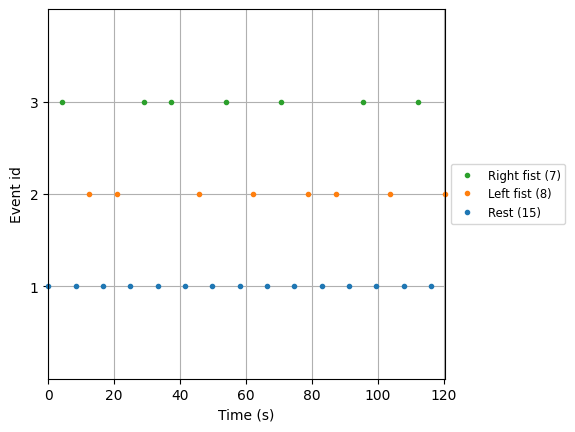

In [ ]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [ ]:
evoked_1 = epochs['1'].average()
evoked_2 = epochs['2'].average()
evoked_3 = epochs['3'].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


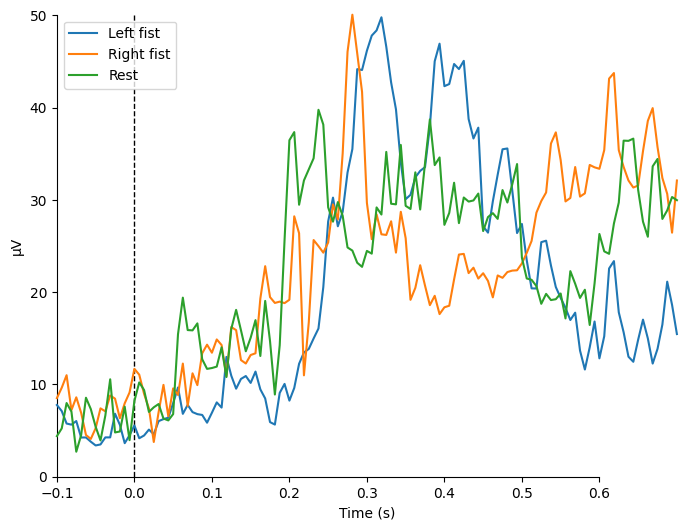

[<Figure size 800x600 with 1 Axes>]

In [ ]:
dicts={'Left fist':evoked_1,'Right fist':evoked_2, 'Rest':evoked_3}
mne.viz.plot_compare_evokeds(dicts)

In [ ]:
#Bandpass filtering
raw.filter(1, 40., l_trans_bandwidth='auto', h_trans_bandwidth='auto',
           filter_length='auto', phase='zero')

Filtering raw data in 37 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


<RawEDF | S005R01.edf, 64 x 643360 (4021.0 s), ~314.2 MB, data loaded>

Effective window size : 12.800 (s)


<ipython-input-30-f45d1e284c57>:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  raw.compute_psd(tmax=np.inf, fmax=80).plot()
<ipython-input-30-f45d1e284c57>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(tmax=np.inf, fmax=80).plot()


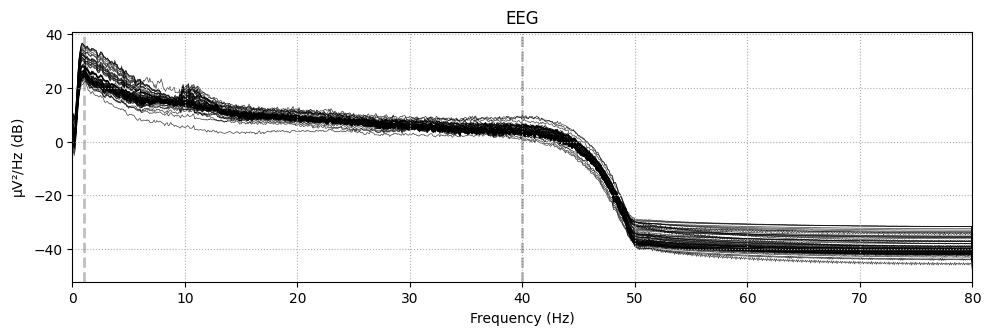

In [ ]:
raw.compute_psd(tmax=np.inf, fmax=80).plot()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf, read_raw_gdf
from mne.datasets import eegbci
from mne.decoding import CSP

# print(__doc__)

# #############################################################################
# # Set parameters and read data

# avoid classification of evoked responses by using epochs that start 1s after
# cue onset.
tmin, tmax = -1.0, 4.0
event_id = dict(rest = 1, left=2, right=3)

# raw_fnames = np.concatenate([eegbci.load_data(sub_id,[4,8,12]) for sub_id in range(1,80)])
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in fnames])
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("standard_1005")
raw.set_montage(montage)

# Apply band-pass filter
raw.filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

events, _ = events_from_annotations(raw, event_id=dict(T0 = 1, T1 = 2, T2 = 3))

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)
labels = epochs.events[:, -1] - 2

Extracting EDF parameters from /content/dataset/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/dataset/files/S001/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/dataset/files/S001/S001R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/dataset/files/S002/S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from /content/dataset/files/S002/S002R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info stru

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
5310 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5310 events and 801 original time points ...
182 bad epochs dropped


In [5]:
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()

In [9]:
epochs_data.shape

(5128, 64, 801)

In [8]:
epochs_data_train.shape

(5128, 64, 161)

In [11]:
labels.shape

(5128,)

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(epochs_data, labels,test_size=0.25,random_state=42)
X_train,X_Valid,Y_train,Y_Valid=train_test_split(train_x,train_y,test_size=0.25,random_state=42)

In [14]:
X_train.shape

(2884, 64, 801)

In [15]:
test_x.shape

(1282, 64, 801)

In [17]:
X_Valid.shape

(962, 64, 801)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
scores = []
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=10, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=None)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1.0 - class_balance)
print(
    "Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance)
)

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

Computing rank from data with rank=None
    Using tolerance 0.0011 (2.2e-16 eps * 64 dim * 7.6e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00076 (2.2e-16 eps * 64 dim * 5.3e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00074 (2.2e-16 eps * 64 dim * 5.2e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0011 (2.2e-16 eps * 64 dim * 7.5e+10  max singular value)
  

Computing rank from data with rank=None
    Using tolerance 0.00058 (2.2e-16 eps * 64 dim * 4.1e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00041 (2.2e-16 eps * 64 dim * 2.9e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0004 (2.2e-16 eps * 64 dim * 2.8e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0006 (2.2e-16 eps * 64 dim * 4.2e+10  max singular value)
  

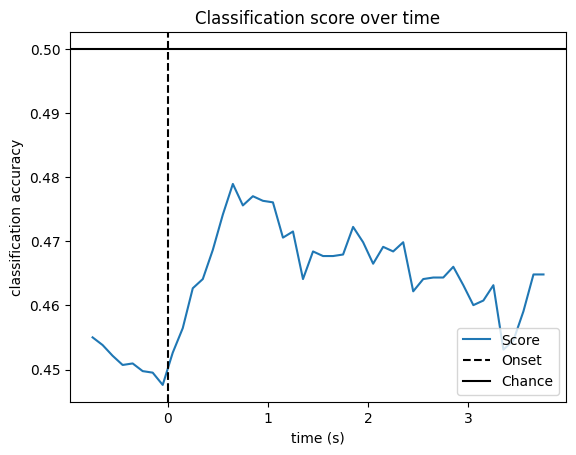

In [ ]:
sfreq = raw.info["sfreq"]
w_length = int(sfreq * 0.5)  # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
    X_test = csp.transform(epochs_data_train[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n : (n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.0) / sfreq + epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label="Score")
plt.axvline(0, linestyle="--", color="k", label="Onset")
plt.axhline(0.5, linestyle="-", color="k", label="Chance")
plt.xlabel("time (s)")
plt.ylabel("classification accuracy")
plt.title("Classification score over time")
plt.legend(loc="lower right")
plt.show()

In [18]:
del epochs_data

In [20]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)
score = clf.score(text_x, test_y)
print('Test accuracy:', score)

ValueError: ignored

In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout, LeakyReLU, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam, SGD
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32, 2, activation='relu'),
  tf.keras.layers.MaxPooling1D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(17, activation='relu'),
  tf.keras.layers.Dense(1, activation='softmax')
])

adam = Adam(learning_rate = 0.001)

model.compile(optimizer = adam, loss = "sparse_categorical_crossentropy", metrics = ['accuracy','mse'])

# model.summary()

In [ ]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
model=Sequential()
model.add(Conv1D(filters=5,kernel_size=3,strides=1))#1
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPool1D(pool_size=1,strides=1))#2
model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
model.add(LeakyReLU())
model.add(MaxPool1D(pool_size=1,strides=1))#4
model.add(Dropout(0.5))
model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
model.add(LeakyReLU())
model.add(AveragePooling1D(pool_size=1,strides=1))#6
model.add(Dropout(0.5))
model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
model.add(LeakyReLU())
model.add(AveragePooling1D(pool_size=1,strides=1))#8
model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
model.add(LeakyReLU())
model.add(GlobalAveragePooling1D())#10
model.add(Dense(1,activation='sigmoid'))#11

model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    # val_acc = history.history['val_accuracy']
    # val_loss = history.history['val_loss']
    epochs = range(len(acc))
 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc',linewidth=2)
    # plt.plot(epochs, val_acc, 'r--', label='Validation acc',linewidth=2)
    plt.title('Training  accuracy')
    plt.legend()
 
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    # plt.plot(epochs, val_loss, 'k', label='Validation loss ')
    plt.title('Training loss')
    plt.legend()
 
    plt.show()

In [ ]:
X_train.shape

(3406, 3)

In [ ]:
y_train.shape

(3406,)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
import time
import numpy as np
#filtered data
start=time.time()
es_callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience = 3)
history =model.fit(X_train, y_train, epochs = 100)
print('training time taken: ',round(time.time()-start,0),'seconds')

Epoch 1/100
53/53 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.2581 - mse: nan
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 3/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 4/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 7/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 8/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 9/100
53/53 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2635 - mse: nan
Epoch 10/100
53/53 [=================

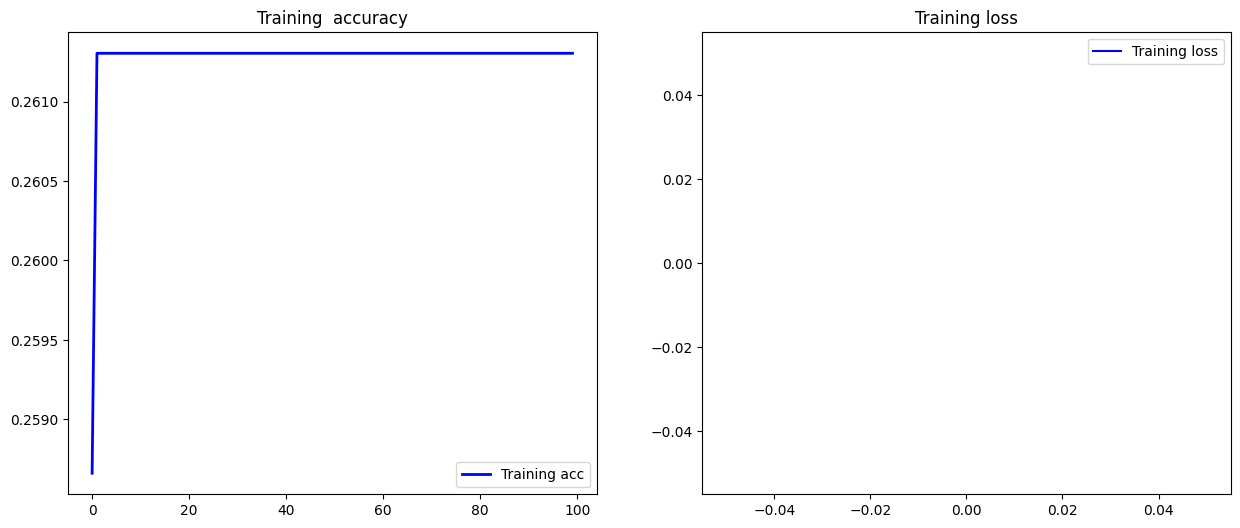

In [ ]:
plot_training_history(history)

In [ ]:
import tensorflow as tf
# Create the model.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling1D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='softmax')
])

# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model.
model.fit(X_train, y_train, epochs=10)

# Evaluate the model.
model.evaluate(X_test, y_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 13s 81ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 4/10
2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 9/10
2/2 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5556
Epoch 10/10
1/1 [==============================] - 0s 244ms/step - loss: 0.0000e+00 - accuracy: 0.4444


[0.0, 0.4444444477558136]

In [ ]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D

# Create the neural network model.
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile the model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

In [ ]:
model.fit(train_dataset, epochs=10)


Epoch 1/10


ValueError: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout, LeakyReLU, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
load = 1
time_steps = 1000
subsample = 50
model = Sequential()
model.add(Dense(64, input_shape=(time_steps//subsample, 1, 4), activation='relu'))
# model.add(keras.layers.Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
# model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))



adam = Adam(lr = 0.001)

model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20, 1, 64)         320       
                                                                 
 dense_11 (Dense)            (None, 20, 1, 16)         1040      
                                                                 
 dense_12 (Dense)            (None, 20, 1, 12)         204       
                                                                 
 dense_13 (Dense)            (None, 20, 1, 6)          78        
                                                                 
 flatten_2 (Flatten)         (None, 120)               0         
                                                                 
 dense_14 (Dense)            (None, 3)                 363       
                                                                 
Total params: 2,005
Trainable params: 2,005
Non-traina

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

k = 10

kf = KFold(n_splits=k)

for train_index, test_index in kf.split(X_standard_fil):
    X_train, test_x = X_standard_fil[train_index], X_standard_fil[test_index]
    Y_train, test_y = y[train_index], y[test_index]
    Y_valid, X_valid = X_standard_fil[~np.isin(np.arange(len(X_standard_fil)), train_index)], y[~np.isin(np.arange(len(X_standard_fil)), train_index)]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, Y_rem = train_test_split(X_standard_fil,y, train_size=0.8)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5)

# Training

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Dropout, LeakyReLU, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import tensorflow as tf
load = 1
time_steps = 1000
subsample = 50
model = Sequential()
model.add(Dense(32, input_shape=(time_steps//subsample, 32,1), activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))





adam = Adam(lr = 0.001)

model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ['accuracy','mse'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 20, 32, 32)        64        
                                                                 
 dense_49 (Dense)            (None, 20, 32, 16)        528       
                                                                 
 dense_50 (Dense)            (None, 20, 32, 12)        204       
                                                                 
 flatten_15 (Flatten)        (None, 7680)              0         
                                                                 
 dense_51 (Dense)            (None, 6)                 46086     
                                                                 
Total params: 46,882
Trainable params: 46,882
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def generator(batch_size, X_train, Y_train):
    while 1:        
        x_time_data = np.zeros((batch_size, time_steps//subsample, 32))
        yy = []
        for i in range(batch_size):
            random_index = np.random.randint(0, len(X_train)-time_steps)
            x_time_data[i] = X_train[random_index:random_index+time_steps:subsample]
            yy.append(Y_train[random_index + time_steps])
        yy = np.asarray(yy)
        yield x_time_data.reshape((x_time_data.shape[0],x_time_data.shape[1],  x_time_data.shape[2],1)), yy

In [ ]:
time_steps = 1000
subsample = 50
def val_generator_test(test_x, test_y):
    while 1:
        batch_size = 1
        x_time_data = np.zeros((batch_size, time_steps//subsample, 32))
        yy = []
        for i in range(batch_size):
            random_index = np.random.randint(0, len(test_x)-time_steps)
            x_time_data[i] = test_x[random_index:random_index+time_steps:subsample]
            yy.append(test_y[random_index + time_steps])
        yy = np.asarray(yy)
        yield x_time_data.reshape((x_time_data.shape[0],x_time_data.shape[1], x_time_data.shape[2], 1)), yy

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
 
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc',linewidth=2)
    plt.plot(epochs, val_acc, 'r--', label='Validation acc',linewidth=2)
    plt.title('Training  accuracy')
    plt.legend()
 
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'k', label='Validation loss ')
    plt.title('Training loss')
    plt.legend()
 
    plt.show()

In [ ]:
import time
import numpy as np
start=time.time()
es_callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience = 3)
history = model.fit(generator(2, X_train, Y_train), steps_per_epoch=100, epochs = 50, validation_data=val_generator_test(X_valid, Y_valid),
                              validation_steps=100, callbacks=[es_callback])
print('training time taken: ',round(time.time()-start,0),'seconds')

Epoch 1/50
100/100 [==============================] - 2s 14ms/step - loss: 0.2077 - accuracy: 0.2650 - mse: 0.0640 - val_loss: 0.1319 - val_accuracy: 0.0000e+00 - val_mse: 0.0508
Epoch 2/50
100/100 [==============================] - 1s 11ms/step - loss: 0.1806 - accuracy: 0.0700 - mse: 0.0583 - val_loss: 0.1717 - val_accuracy: 0.0100 - val_mse: 0.0599
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 0.0978 - accuracy: 0.0550 - mse: 0.0449 - val_loss: 0.1281 - val_accuracy: 0.0400 - val_mse: 0.0652
Epoch 4/50
100/100 [==============================] - 1s 11ms/step - loss: 0.1401 - accuracy: 0.3800 - mse: 0.0547 - val_loss: 0.1316 - val_accuracy: 0.0200 - val_mse: 0.0524
Epoch 5/50
100/100 [==============================] - 1s 8ms/step - loss: 0.1197 - accuracy: 0.0650 - mse: 0.0489 - val_loss: 0.1667 - val_accuracy: 0.0700 - val_mse: 0.0526
Epoch 6/50
100/100 [==============================] - 1s 11ms/step - loss: 0.1574 - accuracy: 0.0550 - mse: 0.0542 - val_lo

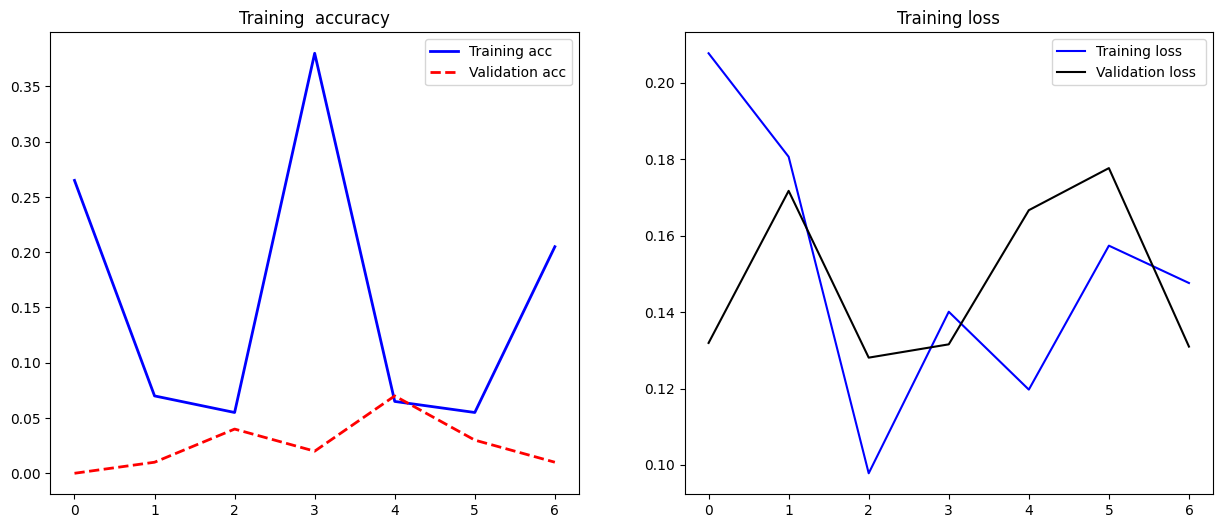

In [ ]:
plot_training_history(history)